<a href="https://colab.research.google.com/github/daevelandiapi/credit_card/blob/master/CREDIT_CARDS_PROJECT_(David).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CREDIT CARD APPROVAL PREDICTION



##Introduction

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. 
 
The **goal** of this notebook is to build a machine learning model to predict if an applicant is 'good' or 'bad' client


---
---

We have 2 databases, both are connected by the variable **ID**.

1.   Application record
2.   Credit record

##Data Loading

Dataset from:  [KAGGLE](https://www.kaggle.com/rikdifos/credit-card-approval-prediction)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

path = '/content/drive/My Drive/Colab Notebooks/00. PROJECT/'
app = pd.read_csv(path + "application_record.csv", index_col = 'ID' )
cred = pd.read_csv(path + "credit_record.csv", index_col = 'ID')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
print('Application shape: \n', app.shape, '\n')  
app.info()

Application shape: 
 (438557, 17) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 5008804 to 6842885
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438557 non-null  object 
 1   FLAG_OWN_CAR         438557 non-null  object 
 2   FLAG_OWN_REALTY      438557 non-null  object 
 3   CNT_CHILDREN         438557 non-null  int64  
 4   AMT_INCOME_TOTAL     438557 non-null  float64
 5   NAME_INCOME_TYPE     438557 non-null  object 
 6   NAME_EDUCATION_TYPE  438557 non-null  object 
 7   NAME_FAMILY_STATUS   438557 non-null  object 
 8   NAME_HOUSING_TYPE    438557 non-null  object 
 9   DAYS_BIRTH           438557 non-null  int64  
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  FLAG_MOBIL           438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           4385

In [ ]:
print('Credit shape: \n', cred.shape, '\n')
cred.info()

Credit shape: 
 (1048575, 2) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 5001711 to 5150487
Data columns (total 2 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   MONTHS_BALANCE  1048575 non-null  int64 
 1   STATUS          1048575 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.0+ MB


# APPLICATION RECORD DATASET

**DAYS_BIRTH:** Count backwards from current day (0), -1 means yesterday

**DAYS_EMPLOYED:** Count backwards from current day(0). If positive, it means the person currently unemployed.

In [ ]:
app.head().T

ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500,427500,112500,270000,270000
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment
DAYS_BIRTH,-12005,-12005,-21474,-19110,-19110


# CREDIT RECORD DATASET

**MONTHS_BALANCE**: The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.

**STATUS**:
*  **0:** 1-29 days past due
*  **1:** 30-59 days past due
*  **2:** 60-89 days overdue
*  **3:** 90-119 days overdue
*  **4:** 120-149 days overdue
* **5:** Overdue or bad debts , write-offs for more than 150 days
*  **C:** paid off that month
*  **X:** No loan for the month









In [ ]:
cred.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C


###Duplicates (ID)


**Application** database contain duplicates, the variable **ID** doesn't identify a unique customer.

In [ ]:
print('Number of unique ID: ' , app.index.nunique()) 
print('Number of duplicated ID: ',app.index.duplicated().sum())

Number of unique ID:  438510
Number of duplicated ID:  47


In [ ]:
# ID'S DUPLICATED
app[app.index.duplicated(keep=False)].head().T

ID,7702516,7602432,7602432,7836971,7213374
CODE_GENDER,F,M,F,M,M
FLAG_OWN_CAR,N,N,N,Y,Y
FLAG_OWN_REALTY,Y,Y,N,N,N
CNT_CHILDREN,2,0,0,1,0
AMT_INCOME_TOTAL,180000,315000,117000,157500,148500
NAME_INCOME_TYPE,Working,Commercial associate,Pensioner,Working,Working
NAME_EDUCATION_TYPE,Secondary / secondary special,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Married,Civil marriage,Married,Married,Married
NAME_HOUSING_TYPE,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment
DAYS_BIRTH,-11753,-16627,-24708,-13771,-9950


In [ ]:
# EXAMPLES OF ID'S DUPLICATED
app.loc[[7702516,	7602432]].T

ID,7702516,7702516,7602432,7602432
CODE_GENDER,F,F,M,F
FLAG_OWN_CAR,N,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,N
CNT_CHILDREN,2,1,0,0
AMT_INCOME_TOTAL,180000,117000,315000,117000
NAME_INCOME_TYPE,Working,Working,Commercial associate,Pensioner
NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Higher education,Higher education
NAME_FAMILY_STATUS,Married,Married,Civil marriage,Married
NAME_HOUSING_TYPE,House / apartment,House / apartment,House / apartment,House / apartment
DAYS_BIRTH,-11753,-11575,-16627,-24708


###Duplicates (Info)
**Application** database contain duplicates, one single customer can be identify in more than one  **ID**.

In [ ]:
print(app.columns)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')


In [ ]:
# INFORMATION DUPLICATED
app[app[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']].duplicated( keep=False)].head().T

ID,5008804,5008805,5008808,5008809,5008810
CODE_GENDER,M,M,F,F,F
FLAG_OWN_CAR,Y,Y,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500,427500,270000,270000,270000
NAME_INCOME_TYPE,Working,Working,Commercial associate,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Single / not married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment
DAYS_BIRTH,-12005,-12005,-19110,-19110,-19110


In [ ]:
# EXAMPLES OF INFORMATION DUPLICATED
app.loc[[5008808, 5008809, 5008810]].T

ID,5008808,5008809,5008810
CODE_GENDER,F,F,F
FLAG_OWN_CAR,N,N,N
FLAG_OWN_REALTY,Y,Y,Y
CNT_CHILDREN,0,0,0
AMT_INCOME_TOTAL,270000,270000,270000
NAME_INCOME_TYPE,Commercial associate,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Single / not married,Single / not married,Single / not married
NAME_HOUSING_TYPE,House / apartment,House / apartment,House / apartment
DAYS_BIRTH,-19110,-19110,-19110


In [ ]:
# NUMBER OF ID'S COMMON TO BOTH DATAFRAMES
idx = list(set(app.index).intersection(set(cred.index)))
print('Number of IDs common to both databases:', len(idx))

Number of IDs common to both databases: 36457


In [ ]:
# FILTER BOTH DATAFRAMES BY COMMON ID
app_1 = app.loc[idx] #Application database
cred_1 = cred.loc[idx] #Credit database

In [ ]:
print('Application shape: ', app_1.shape)
print('Number of unique ID in Application: ', app_1.index.nunique())
app_1.head().T

Application shape:  (36457, 17)
Number of unique ID in Application:  36457


ID,5112591,5112592,5112593,5112594,5112597
CODE_GENDER,F,F,F,F,F
FLAG_OWN_CAR,N,N,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,103500,103500,103500,103500,103500
NAME_INCOME_TYPE,Working,Working,Working,Working,Working
NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Married,Married,Married,Married,Married
NAME_HOUSING_TYPE,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment
DAYS_BIRTH,-22466,-22466,-22466,-22466,-22466


In [ ]:
print('Credit shape: ', cred_1.shape)
print('Number of unique ID in Credit: ', cred_1.index.nunique())
cred_1.head()

Credit shape:  (777715, 2)
Number of unique ID in Credit:  36457


,MONTHS_BALANCE,STATUS
ID,,
5112591,0,C
5112591,-1,C
5112591,-2,C
5112591,-3,C
5112591,-4,C


In [ ]:
START_MONTH = pd.DataFrame(cred_1.groupby(["ID"])["MONTHS_BALANCE"].agg(min)).rename(columns={'MONTHS_BALANCE':'START_MONTH'})
START_MONTH.head()

,START_MONTH
ID,
5008804,-15
5008805,-14
5008806,-29
5008808,-4
5008809,-26


In [ ]:
data = pd.merge(app_1, START_MONTH, how="left", on="ID") 
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,START_MONTH
ID,,,,,,,,,,,,,,,,,,
5112591,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-13
5112592,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-14
5112593,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-40
5112594,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-44
5112597,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-1


In [ ]:
cred_1['TARGET'] = None
cred_1['TARGET'][cred_1['STATUS'] =='2']='Yes' 
cred_1['TARGET'][cred_1['STATUS'] =='3']='Yes' 
cred_1['TARGET'][cred_1['STATUS'] =='4']='Yes' 
cred_1['TARGET'][cred_1['STATUS'] =='5']='Yes' 

cred_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,MONTHS_BALANCE,STATUS,TARGET
ID,,,
5112591,0,C,None
5112591,-1,C,None
5112591,-2,C,None
5112591,-3,C,None
5112591,-4,C,None


In [ ]:
rating = cred_1.groupby('ID').count()
rating['TARGET'][rating['TARGET'] > 0]= 1 
rating['TARGET'][rating['TARGET'] == 0]= 0 

rating = rating[['TARGET']]

data = pd.merge(data, rating, how='inner', on='ID')

data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,START_MONTH,TARGET
ID,,,,,,,,,,,,,,,,,,,
5112591,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-13,0
5112592,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-14,0
5112593,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-40,0
5112594,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-44,0
5112597,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-1,0


In [ ]:
data.isnull().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
START_MONTH                0
TARGET                     0
dtype: int64

In [ ]:
data.OCCUPATION_TYPE.unique()

array(['Managers', 'Core staff', 'Cooking staff', nan, 'Sales staff',
       'High skill tech staff', 'Laborers', 'Drivers', 'Medicine staff',
       'Realty agents', 'Accountants', 'IT staff', 'Cleaning staff',
       'Private service staff', 'Low-skill Laborers', 'Secretaries',
       'HR staff', 'Security staff', 'Waiters/barmen staff'], dtype=object)

In [ ]:
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna('Not Available')

In [ ]:
data.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Student'], dtype=object)

In [ ]:
data.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
data.NAME_FAMILY_STATUS.unique()

array(['Married', 'Civil marriage', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [ ]:
data.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
data.OCCUPATION_TYPE.unique()

array(['Managers', 'Core staff', 'Cooking staff', 'Not Available',
       'Sales staff', 'High skill tech staff', 'Laborers', 'Drivers',
       'Medicine staff', 'Realty agents', 'Accountants', 'IT staff',
       'Cleaning staff', 'Private service staff', 'Low-skill Laborers',
       'Secretaries', 'HR staff', 'Security staff',
       'Waiters/barmen staff'], dtype=object)

In [ ]:
data.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
START_MONTH            0
TARGET                 0
dtype: int64

In [ ]:
print('Data shape: \n', data.shape, '\n')  
data.info()

Data shape: 
 (36457, 19) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 5112591 to 5111206
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   DAYS_BIRTH           36457 non-null  int64  
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  FLAG_MOBIL           36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  

In [ ]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,START_MONTH,TARGET
ID,,,,,,,,,,,,,,,,,,,
5112591,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-13,0
5112592,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-14,0
5112593,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-40,0
5112594,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-44,0
5112597,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466,-12870,1,1,1,0,Managers,2.0,-1,0


In [ ]:
flag_columns = [x for x in data.columns if x.startswith('FLAG_')]                                                          
cat_columns  = [x for x in data.columns if x.startswith('CODE_') or x.startswith('NAME_') or x.startswith('OCCUPATION_') ] 
num_columns  = [x for x in data.columns if x.startswith('CNT_')] + [x for x in data.columns if x.startswith('AMT_') or x.startswith('DAYS_')]          

In [ ]:
data = data[flag_columns + cat_columns + num_columns + ['START_MONTH'] + ['TARGET']]

data.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,START_MONTH,TARGET
ID,,,,,,,,,,,,,,,,,,,
5112591,N,Y,1,1,1,0,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-13,0
5112592,N,Y,1,1,1,0,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-14,0
5112593,N,Y,1,1,1,0,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-40,0
5112594,N,Y,1,1,1,0,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-44,0
5112597,N,Y,1,1,1,0,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-1,0


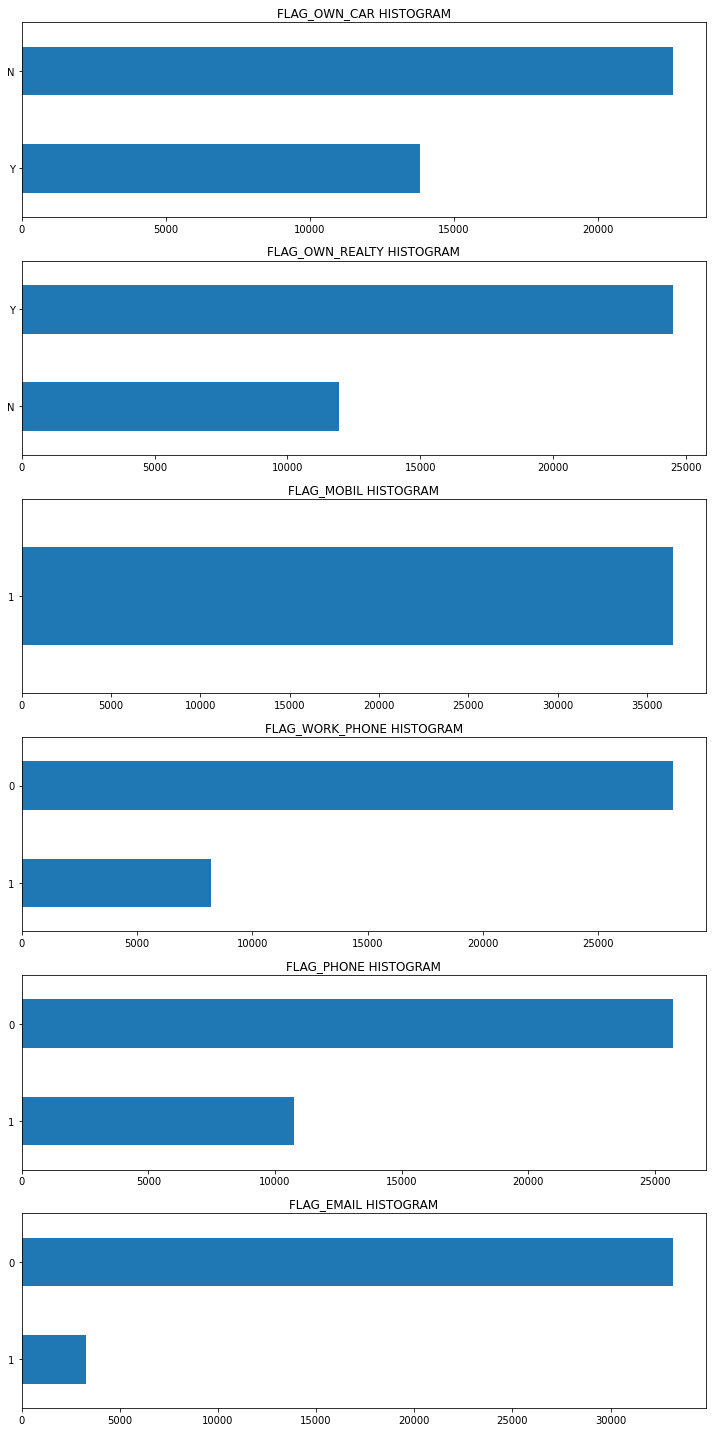

In [ ]:
fig, axes = plt.subplots(nrows= len(flag_columns),  figsize=(10,20))

for col, ax in zip(data[flag_columns], axes):
   data[col].value_counts().sort_values().plot.barh(ax=ax, title=col + ' HISTOGRAM')

plt.tight_layout()    
plt.show()

In [ ]:
data.drop(columns= ['FLAG_MOBIL'], inplace= True)
data.drop(columns= ['FLAG_WORK_PHONE'], inplace= True)
data.drop(columns= ['FLAG_PHONE'], inplace= True)
data.drop(columns= ['FLAG_EMAIL'], inplace= True)

flag_columns.remove('FLAG_MOBIL')
flag_columns.remove('FLAG_WORK_PHONE')
flag_columns.remove('FLAG_PHONE')
flag_columns.remove('FLAG_EMAIL')

data.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,START_MONTH,TARGET
ID,,,,,,,,,,,,,,,
5112591,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-13,0
5112592,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-14,0
5112593,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-40,0
5112594,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-44,0
5112597,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-1,0


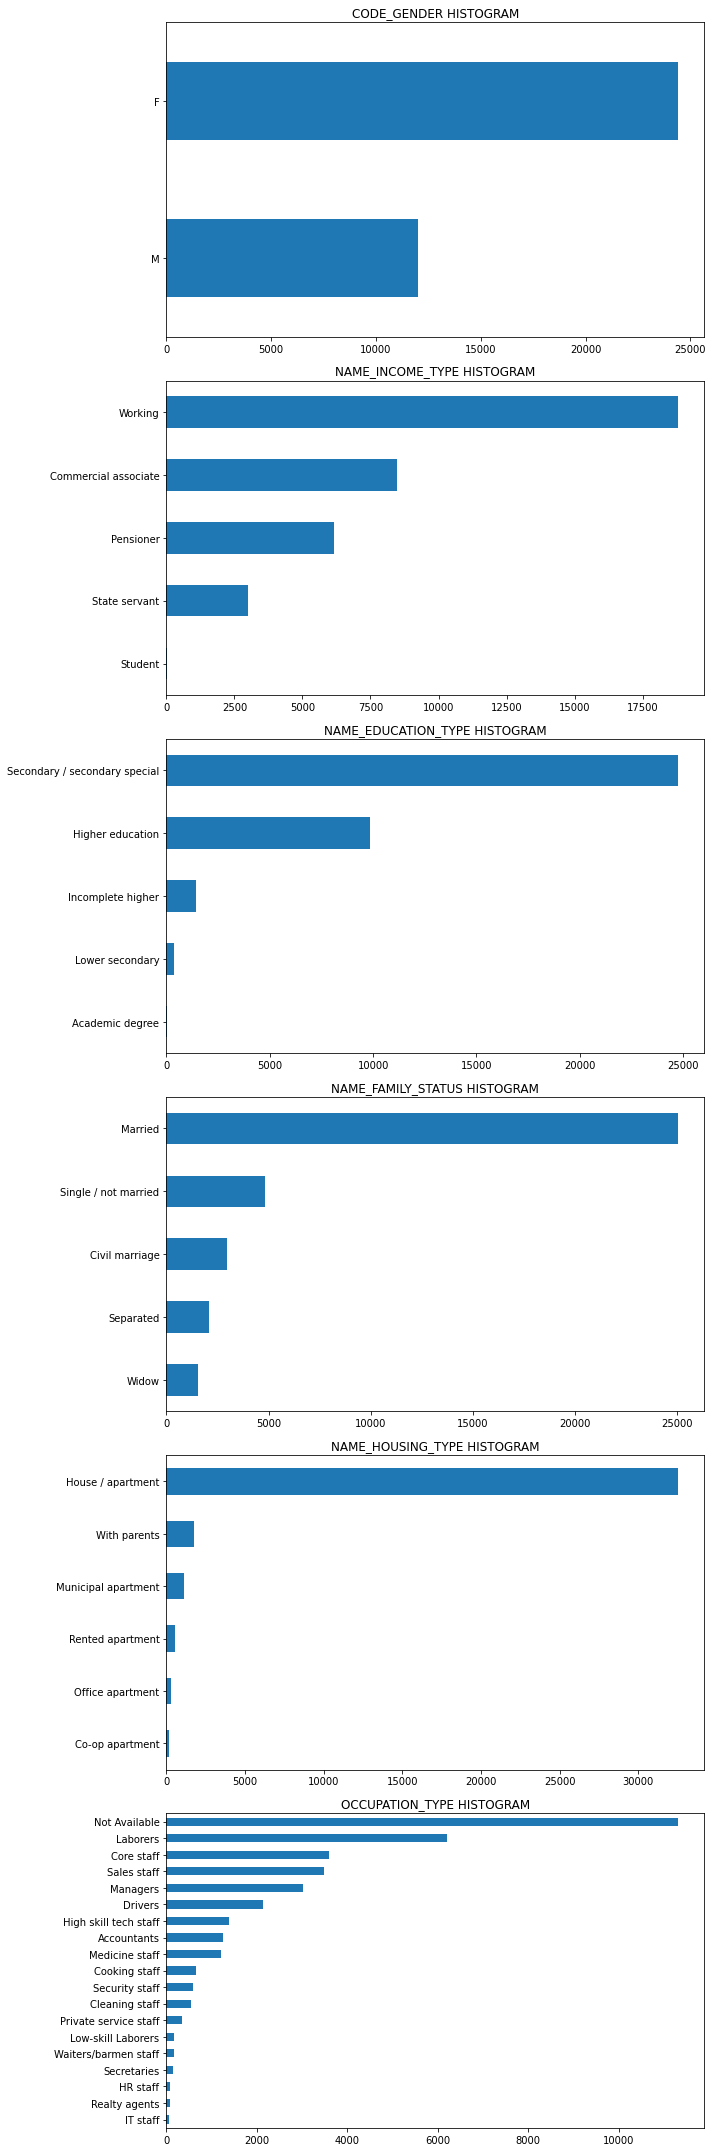

In [ ]:
fig, axes = plt.subplots(nrows= len(cat_columns),  figsize=(10,30))

for col, ax in zip(data[cat_columns], axes):
   data[col].value_counts().sort_values().plot.barh(ax=ax, title=col + ' HISTOGRAM')

plt.tight_layout()       
plt.show()

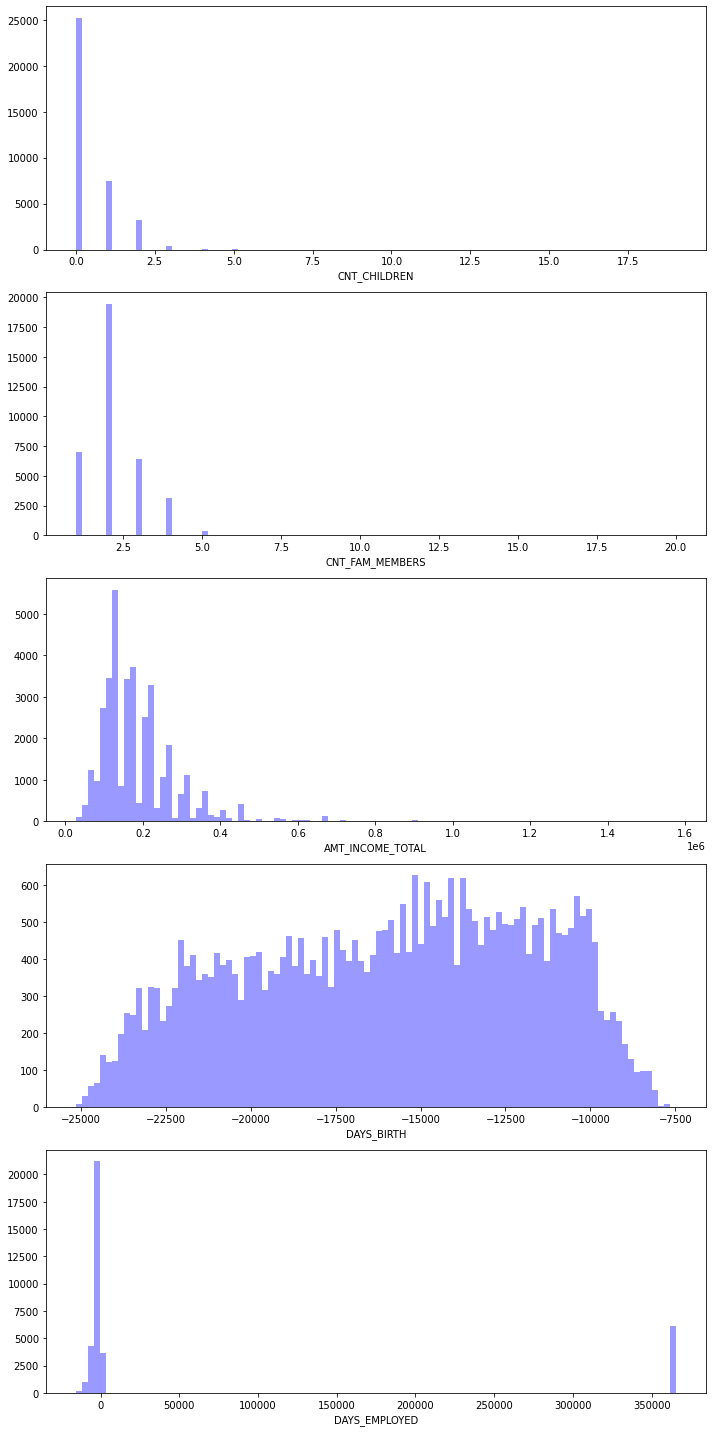

In [ ]:
fig, axes = plt.subplots(nrows= len(num_columns), figsize=(10,20))

for col, ax in zip(data[num_columns], axes):
    sns.distplot( data[col], ax=ax, color='b', hist= True, kde=False, bins = 100 )

plt.tight_layout()       
plt.show()

In [ ]:
data.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,START_MONTH,TARGET
ID,,,,,,,,,,,,,,,
5112591,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-13,0
5112592,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-14,0
5112593,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-40,0
5112594,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-44,0
5112597,N,Y,F,Working,Secondary / secondary special,Married,House / apartment,Managers,0,2.0,103500.0,-22466,-12870,-1,0


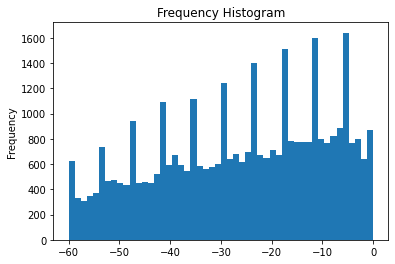

In [ ]:
plt.hist(data.START_MONTH, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

Text(0.5, 1.0, 'Target Distributions \n (0: GOOD|| 1: BAD)')

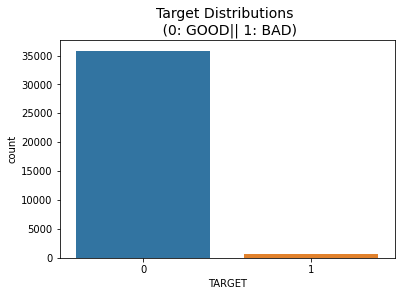

In [ ]:
sns.countplot('TARGET', data=data)
plt.title('Target Distributions \n (0: GOOD|| 1: BAD)', fontsize=14)

In [ ]:
dic = {
    'Y' : 1,
    'N' : 0
    }

data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace(dic)
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace(dic)

In [ ]:
dic = {
    'M' : 1,
    'F' : 0
    }

data['CODE_GENDER'] = data['CODE_GENDER'].replace(dic)

In [ ]:
dic = {
    'Commercial associate' : 'Working',
    'State servant' : 'Working',
}
data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].replace(dic)

In [ ]:
dic = {
    'Incomplete higher' : 'Secondary / secondary special',
    'Academic degree' : 'Higher education',
    'Lower secondary' : 'Basic'
}
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].replace(dic)

In [ ]:
dic = {
    'Civil marriage' : 'Married'
}
data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].replace(dic)

In [ ]:
dic = {
    'House / apartment' : 'Rented apartment',
    'Co-op apartment' : 'Rented apartment',
    'Municipal apartment': 'Municipal or Office apartment',
    'Office apartment': 'Municipal or Office apartment'
}

data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].replace(dic)

In [ ]:
dic = {    
    'Managers' : 'Group 1',
    'Realty agents' : 'Group 1',
    'Drivers' : 'Group 1',
    'Accountants' : 'Group 1',
    'IT staff' : 'Group 2',
    'Private service staff' : 'Group 2',
    'High skill tech staff' : 'Group 2',
    'HR staff' : 'Group 2',
    'Core staff' : 'Group 2',
    'Laborers' : 'Group 3',
    'Security staff' : 'Group 3',
    'Sales staff' : 'Group 3',
    'Not Available' : 'Group 3',
    'Secretaries' : 'Group 3',
    'Medicine staff' : 'Group 4',
    'Waiters/barmen staff' : 'Group 4',
    'Cleaning staff' : 'Group 4',
    'Cooking staff' : 'Group 4',
    'Low-skill Laborers' : 'Group 4'
}

#df['OCCUPATION_TYPE'].replace(dic)
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].replace(dic)

In [ ]:
data_cat = data[cat_columns]
data_dumm = pd.get_dummies(data_cat,  prefix_sep='==')

data_dumm.head()

,CODE_GENDER,NAME_INCOME_TYPE==Pensioner,NAME_INCOME_TYPE==Student,NAME_INCOME_TYPE==Working,NAME_EDUCATION_TYPE==Basic,NAME_EDUCATION_TYPE==Higher education,NAME_EDUCATION_TYPE==Secondary / secondary special,NAME_FAMILY_STATUS==Married,NAME_FAMILY_STATUS==Separated,NAME_FAMILY_STATUS==Single / not married,NAME_FAMILY_STATUS==Widow,NAME_HOUSING_TYPE==Municipal or Office apartment,NAME_HOUSING_TYPE==Rented apartment,NAME_HOUSING_TYPE==With parents,OCCUPATION_TYPE==Group 1,OCCUPATION_TYPE==Group 2,OCCUPATION_TYPE==Group 3,OCCUPATION_TYPE==Group 4
ID,,,,,,,,,,,,,,,,,,
5112591,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
5112592,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
5112593,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
5112594,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
5112597,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
data.drop(columns = cat_columns, inplace= True)

In [ ]:
data_dumm.head()

,CODE_GENDER,NAME_INCOME_TYPE==Pensioner,NAME_INCOME_TYPE==Student,NAME_INCOME_TYPE==Working,NAME_EDUCATION_TYPE==Basic,NAME_EDUCATION_TYPE==Higher education,NAME_EDUCATION_TYPE==Secondary / secondary special,NAME_FAMILY_STATUS==Married,NAME_FAMILY_STATUS==Separated,NAME_FAMILY_STATUS==Single / not married,NAME_FAMILY_STATUS==Widow,NAME_HOUSING_TYPE==Municipal or Office apartment,NAME_HOUSING_TYPE==Rented apartment,NAME_HOUSING_TYPE==With parents,OCCUPATION_TYPE==Group 1,OCCUPATION_TYPE==Group 2,OCCUPATION_TYPE==Group 3,OCCUPATION_TYPE==Group 4
ID,,,,,,,,,,,,,,,,,,
5112591,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
5112592,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
5112593,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
5112594,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
5112597,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
data = pd.concat([data_dumm, data], axis = 1)
data.head()

,CODE_GENDER,NAME_INCOME_TYPE==Pensioner,NAME_INCOME_TYPE==Student,NAME_INCOME_TYPE==Working,NAME_EDUCATION_TYPE==Basic,NAME_EDUCATION_TYPE==Higher education,NAME_EDUCATION_TYPE==Secondary / secondary special,NAME_FAMILY_STATUS==Married,NAME_FAMILY_STATUS==Separated,NAME_FAMILY_STATUS==Single / not married,NAME_FAMILY_STATUS==Widow,NAME_HOUSING_TYPE==Municipal or Office apartment,NAME_HOUSING_TYPE==Rented apartment,NAME_HOUSING_TYPE==With parents,OCCUPATION_TYPE==Group 1,OCCUPATION_TYPE==Group 2,OCCUPATION_TYPE==Group 3,OCCUPATION_TYPE==Group 4,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,START_MONTH,TARGET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5112591,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-13,0
5112592,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-14,0
5112593,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-40,0
5112594,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-44,0
5112597,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-1,0


In [ ]:
data[flag_columns] = data[flag_columns].astype('uint8')

data.head()

,CODE_GENDER,NAME_INCOME_TYPE==Pensioner,NAME_INCOME_TYPE==Student,NAME_INCOME_TYPE==Working,NAME_EDUCATION_TYPE==Basic,NAME_EDUCATION_TYPE==Higher education,NAME_EDUCATION_TYPE==Secondary / secondary special,NAME_FAMILY_STATUS==Married,NAME_FAMILY_STATUS==Separated,NAME_FAMILY_STATUS==Single / not married,NAME_FAMILY_STATUS==Widow,NAME_HOUSING_TYPE==Municipal or Office apartment,NAME_HOUSING_TYPE==Rented apartment,NAME_HOUSING_TYPE==With parents,OCCUPATION_TYPE==Group 1,OCCUPATION_TYPE==Group 2,OCCUPATION_TYPE==Group 3,OCCUPATION_TYPE==Group 4,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,START_MONTH,TARGET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5112591,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-13,0
5112592,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-14,0
5112593,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-40,0
5112594,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-44,0
5112597,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2.0,103500.0,-22466,-12870,-1,0


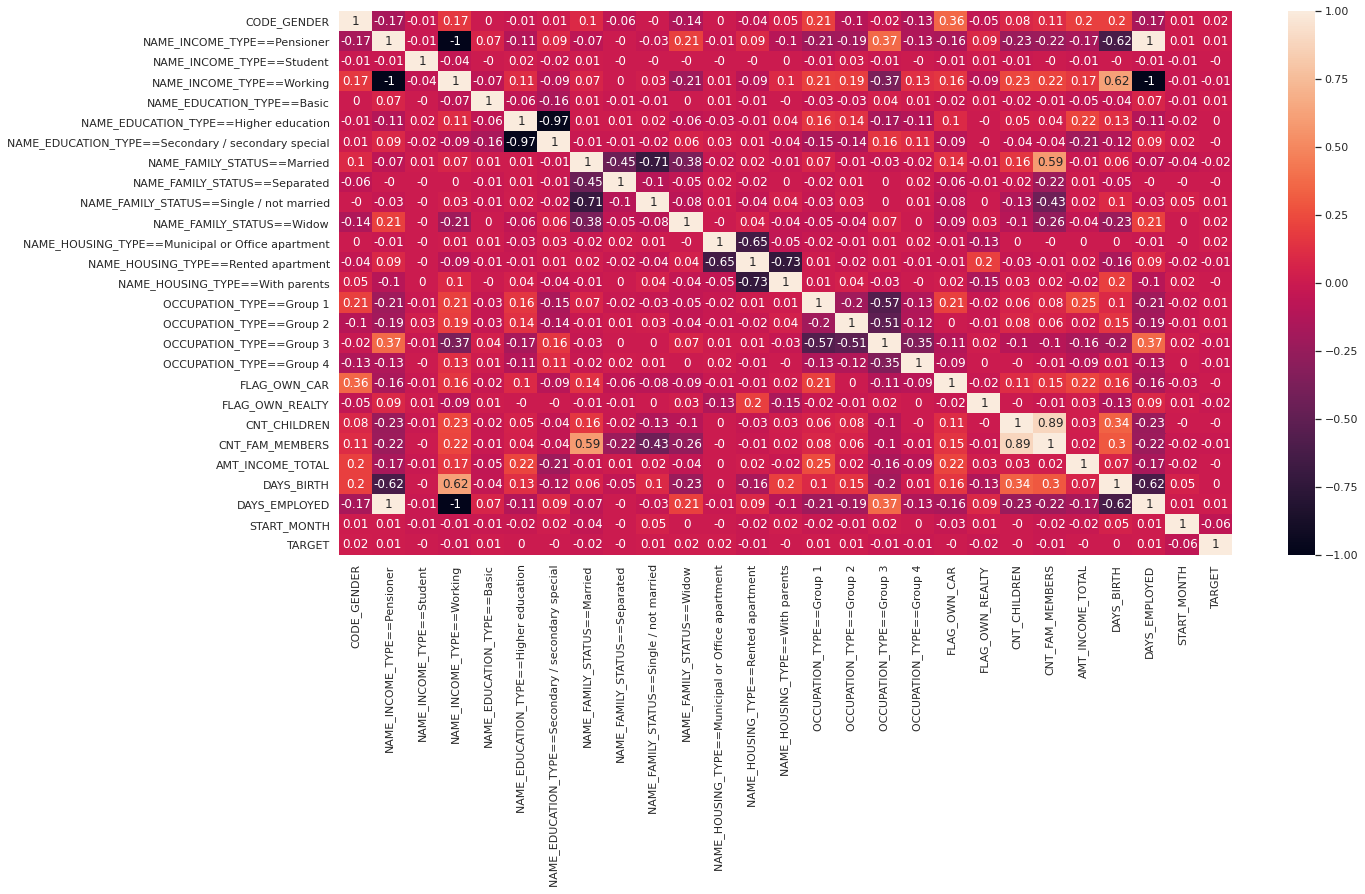

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

correlation_matrix = data.corr().round(2)
sns.heatmap(data= correlation_matrix, annot=True)

In [ ]:
data.columns

Index(['CODE_GENDER', 'NAME_INCOME_TYPE==Pensioner',
       'NAME_INCOME_TYPE==Student', 'NAME_INCOME_TYPE==Working',
       'NAME_EDUCATION_TYPE==Basic', 'NAME_EDUCATION_TYPE==Higher education',
       'NAME_EDUCATION_TYPE==Secondary / secondary special',
       'NAME_FAMILY_STATUS==Married', 'NAME_FAMILY_STATUS==Separated',
       'NAME_FAMILY_STATUS==Single / not married', 'NAME_FAMILY_STATUS==Widow',
       'NAME_HOUSING_TYPE==Municipal or Office apartment',
       'NAME_HOUSING_TYPE==Rented apartment',
       'NAME_HOUSING_TYPE==With parents', 'OCCUPATION_TYPE==Group 1',
       'OCCUPATION_TYPE==Group 2', 'OCCUPATION_TYPE==Group 3',
       'OCCUPATION_TYPE==Group 4', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'START_MONTH', 'TARGET'],
      dtype='object')

In [ ]:
Y = data['TARGET']
X = data[['CODE_GENDER', 'NAME_INCOME_TYPE==Pensioner',
       'NAME_INCOME_TYPE==Student', 'NAME_INCOME_TYPE==Working',
       'NAME_EDUCATION_TYPE==Basic', 'NAME_EDUCATION_TYPE==Higher education',
       'NAME_EDUCATION_TYPE==Secondary / secondary special',
       'NAME_FAMILY_STATUS==Married', 'NAME_FAMILY_STATUS==Separated',
       'NAME_FAMILY_STATUS==Single / not married', 'NAME_FAMILY_STATUS==Widow',
       'NAME_HOUSING_TYPE==Municipal or Office apartment',
       'NAME_HOUSING_TYPE==Rented apartment',
       'NAME_HOUSING_TYPE==With parents', 'OCCUPATION_TYPE==Group 1',
       'OCCUPATION_TYPE==Group 2', 'OCCUPATION_TYPE==Group 3',
       'OCCUPATION_TYPE==Group 4', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'START_MONTH']]

In [ ]:
from imblearn.over_sampling import SMOTE
X_balance,Y_balance = SMOTE().fit_sample(X,Y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Target Distributions \n (0: GOOD|| 1: BAD)')

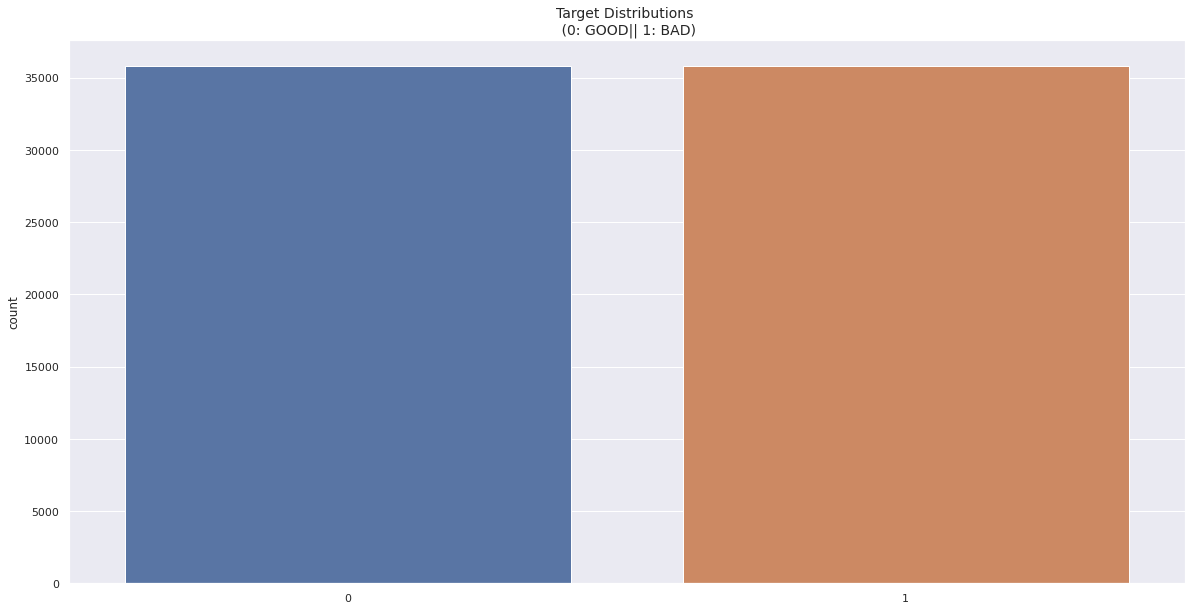

In [ ]:
sns.countplot(Y_balance)
plt.title('Target Distributions \n (0: GOOD|| 1: BAD)', fontsize=14)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 10086)

Accuracy Score is 0.5991629853522437
      0     1
0  6275  4478
1  4142  6610


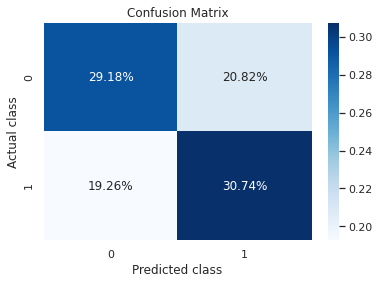

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=0, solver='lbfgs')

clf = logit.fit(X_train, y_train)

y_predict = clf.predict(X_test)

print('Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))


plt.figure(figsize=(6,4))

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues' )

plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix");

Accuracy Score is 0.9816321785631249
       0      1
0  10527    226
1    169  10583


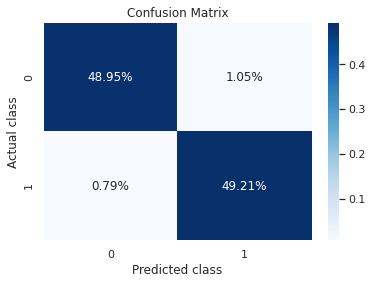

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dtfit = dt.fit(X_train, y_train)
y_predict = dtfit.predict(X_test)

print('Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plt.figure(figsize=(6,4))

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix");



---